In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [27]:
# 查看数据集
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [28]:
# the MNIST images are 28 pixels in each dimension
img_size = 28

# flat -> n.平面
img_size_flat = img_size * img_size

# shape
img_shape = (img_size, img_size)

# class -> n.输出结果的种类 0->9
num_classes = 10

In [29]:
# every image is a vector whose column is the image size 28*28
x = tf.placeholder(tf.float32, [None, img_size_flat])

# every output is a vector that column is 10
y_true = tf.placeholder(tf.float32, [None, num_classes])

# the image real output, type int and one-demensional
y_true_cls = tf.placeholder(tf.int64, [None])

## Variables to be optimized
1. weigths
2. biases

In [30]:
# shape can be computed by the x demension and y_true demension
# because x * w= y_true
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))

# biases is one-demensional 
# x * w + b = y_true
# matrix x * w is [None, num_classes], biases is added to each row
# so the biases shape is [1, num_classes]
biases = tf.Variable(tf.zeros([num_classes]))

In [31]:
logits = tf.matmul(x, weights) + biases

"""
now the shape of logits is [num_images, num_class]
logits[i][j] = the estimates(猜测) of the i'th image is the number j

So need to normalize it

"""

"\nnow the shape of logits is [num_images, num_class]\nlogits[i][j] = the estimates(猜测) of the i'th image is the number j\n\nSo need to normalize it\n\n"

## Normalize
why: those estimates(猜测）are a bit rough and difficult to interpret(解释) because the number may be vary small or large, so we need to normalize.

how: use some function to change the estimates limited between zero and one.

some function:(wait to read)
- [softmax](http://ufldl.stanford.edu/wiki/index.php/Softmax%E5%9B%9E%E5%BD%92)

In [32]:
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.arg_max(y_pred, dimension=1)

## Cost-function to be optimized
定义一个损失函数，测量模型的性能。
一开始学习的时候都是使用平方差之和函数，即
(y_pred - y_true)^2之和
而在这里使用交叉熵代价函数(wait to read)
[交叉熵](http://blog.csdn.net/u014313009/article/details/51043064)

In [33]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                        labels=y_true)

[tensorflow学习之常用函数总结](http://blog.csdn.net/qq_32166627/article/details/52734387)

求最大值tf.reduce_max(input_tensor, reduction_indices=None, keep_dims=False, name=None)
求平均值tf.reduce_mean(input_tensor, reduction_indices=None, keep_dims=False, name=None)
参数1--input_tensor:待求值的tensor。
参数2--reduction_indices:在哪一维上求解。

In [34]:
# take the average as current model performance
cost = tf.reduce_mean(cross_entropy)

## Optimization method
Now the problem is minimize the cost ,so wu create an optimizer.

One way of optimizer is Gradient Descent.
梯度下降法：
设置步长rate，cost对每一个w求导，w的增量为w' * rate,
更新所有w，再次计算cost，循环下去

In [35]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

## 训练过程的可视化

In [75]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
# tf.cast 把布尔型向量转成浮点型
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [76]:
session = tf.Session()

In [78]:
session.run(tf.global_variables_initializer())

In [54]:
# 每次训练取出部分数据来训练
batch_size = 100

In [56]:
def optimize(num_iterations):
    for i in range(num_iterations):
        
        x_batch, y_train_batch = data.train.next_batch(batch_size)
        
        # x, y_true对应前面定义的placeholder
        feed_dict_train = {x: x_batch,
                           y_true: y_train_batch}
        
        session.run(optimizer, feed_dict=feed_dict_train)

关于feed_dict的疑问？
feed_dict这个参数是怎么把数据传给optimizer

我的猜测：

    feed_dict_train传递了键值为'x'和'y_true'，而这两个键值对应上面定义的placeholder
    x = tf.placeholder(tf.float32, [None, img_size_flat])
    y_true = tf.placeholder(tf.float32, [None, num_classes])
    optimizer执行minimize方法知道它需要优化的是cost 变量，往上找
    这一步只是求平均值，数据的原点不在这
    cost = tf.reduce_mean(cross_entropy)
    这里用到了logits和y_true
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y_true)
    logits又用到了x， weights和biases都是Variables型变量
    logits = tf.matmul(x, weights) + biases
    
 所以feed_dict会把对应的键值赋给对应的placeholder变量
 
 定义placeholder只是定义了变量的类型，并未保存数据
    
关于placeholder和Variable的区别
>那么，什么时候该用tf.placeholder，什么时候该使用tf.Variable之类直接定义参数呢？

>答案是，tf.Variable适合一些需要初始化或被训练而变化的权重或参数，而tf.placeholder适合通常不会改变的被训练的数据集。

### 相关链接
[tensorflow feed_dict 传入序列](http://blog.csdn.net/myjiayan/article/details/60885226)

[TensorFlow入门 数据与参数的输入](https://zhuanlan.zhihu.com/p/25307881)

In [57]:
y_true_cls = tf.placeholder(tf.int64, [None])

In [58]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])

### help-function to show performance

In [59]:
feed_dict_test = {x: data.test.images,
                  y_true: data.test.labels,
                  y_true_cls: data.test.cls}

In [60]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

In [61]:
def print_accuracy():
    
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

In [62]:
# confusion matrix混淆矩阵
# 混淆就是一个class被预测成另一个class
# http://blog.csdn.net/vesper305/article/details/44927047
def print_confusion_matrix():
    
    cls_true = data.test.cls
    
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)
    
    # using sklearn to get the confusion matrix
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)
    
    print(cm)
    
    #---------plot part------------------------------#
    # Plot the confusion matrix as an image.
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

In [82]:
def plot_example_errors():
    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)
    
    
    # Negate(取反) the boolean array,
    incorrect = (correct == False)
    
    images = data.test.images[incorrect]
    
    cls_pred = cls_pred[incorrect]
    cls_true = data.test.cls[incorrect]
    
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [64]:
def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
    w = session.run(weights)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(img_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.渐变图
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])

In [79]:
print_accuracy()

Accuracy on test-set: 9.8%


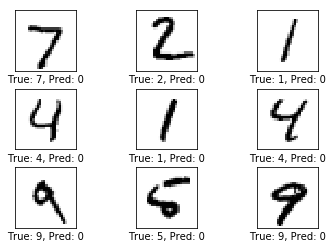

In [83]:
plot_example_errors()

In [84]:
optimize(num_iterations=1)

In [85]:
print_accuracy()

Accuracy on test-set: 15.5%


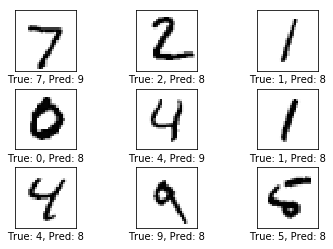

In [86]:
plot_example_errors()

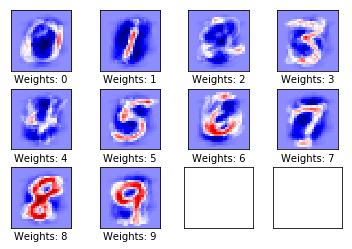

In [87]:
plot_weights()

In [89]:
# 迭代次数改为10次
optimize(num_iterations=10)

In [90]:
print_accuracy()

Accuracy on test-set: 79.2%


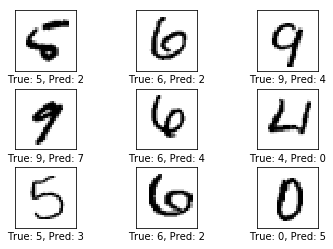

In [91]:
plot_example_errors()

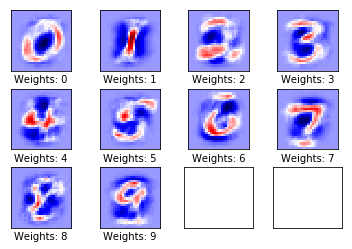

In [92]:
plot_weights()

可以看出，在迭代次数增加之后，准确率变高了